# Analysis – Unencrypted Data

In [21]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

## Load Data

In [2]:
df = pd.read_csv('../data/preprocessed_data.csv')
df

,video_on,num_clients,topology,total_packets,total_bytes,avg_bytes,std_bytes,median_bytes,max_bytes,total_packets_in,...,total_packets_out,total_bytes_out,avg_bytes_out,std_bytes_out,median_bytes_out,max_bytes_out,avg_inter_arr,std_inter_arr,median_inter_arr,max_inter_arr
0,False,3.0,hdumb,72331.0,6492047.0,89.754697,26.624026,78.0,546.0,31533.0,...,40798.0,3751315.0,91.948502,28.441660,82.0,359.0,0.006281,0.004844,0.005180,0.104380
1,False,3.0,hdumb,66143.0,6044641.0,91.387464,29.381103,80.0,547.0,31436.0,...,34707.0,3343593.0,96.337713,30.726329,109.0,359.0,0.006287,0.005072,0.005150,0.132999
2,False,3.0,hdumb,64748.0,5871180.0,90.677395,27.837224,78.0,546.0,31432.0,...,33316.0,3155607.0,94.717463,30.608030,104.0,359.0,0.006283,0.004910,0.005263,0.038957
3,False,8.0,hdumb,343012.0,29201537.0,85.132698,22.277256,77.0,547.0,84033.0,...,258979.0,22600016.0,87.265825,22.805335,78.0,359.0,0.002316,0.002009,0.001817,0.031288
4,False,8.0,hdumb,318825.0,26882146.0,84.316305,21.738617,77.0,547.0,83843.0,...,234982.0,20340810.0,86.563269,22.550933,78.0,359.0,0.002321,0.002176,0.001755,0.054932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,False,3.0,tiered,65003.0,5886799.0,90.561959,27.108087,79.0,547.0,29641.0,...,35362.0,3308969.0,93.574147,29.253844,88.0,359.0,0.006298,0.004652,0.005239,0.089555
72,False,3.0,tiered,60788.0,5518866.0,90.788741,27.799835,79.0,547.0,29926.0,...,30862.0,2938423.0,95.211684,30.605463,104.0,359.0,0.006284,0.004816,0.005122,0.058126
73,True,3.0,tiered,198117.0,92448927.0,466.638032,412.351986,347.0,1214.0,113233.0,...,84884.0,26672584.0,314.223929,307.998272,126.0,1214.0,0.001656,0.001639,0.001178,0.021326
74,True,3.0,tiered,193124.0,91776508.0,475.220625,413.558133,365.0,1214.0,113074.0,...,80050.0,26129597.0,326.415953,312.232944,128.0,1214.0,0.001660,0.001704,0.001167,0.073484


In [3]:
df.dropna(inplace=True)
df['video_on'] = df['video_on'].astype(int)
df.describe()

,video_on,num_clients,total_packets,total_bytes,avg_bytes,std_bytes,median_bytes,max_bytes,total_packets_in,total_bytes_in,...,total_packets_out,total_bytes_out,avg_bytes_out,std_bytes_out,median_bytes_out,max_bytes_out,avg_inter_arr,std_inter_arr,median_inter_arr,max_inter_arr
count,72.000000,72.000000,72.000000,7.200000e+01,72.000000,72.000000,72.000000,72.000000,72.000000,7.200000e+01,...,72.000000,7.200000e+01,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,0.513889,5.263889,286464.013889,1.000713e+08,266.091899,219.083100,181.666667,889.347222,115750.055556,5.456787e+07,...,170713.958333,4.550346e+07,204.443258,172.187071,117.250000,792.597222,0.006940,0.006996,0.004728,0.120766
std,0.503315,2.062359,242681.378667,1.196231e+08,182.063731,192.338523,136.600579,335.622951,86167.373436,5.805907e+07,...,163712.210226,6.565997e+07,122.622294,146.891594,66.902652,427.904842,0.027179,0.026720,0.017159,0.183582
min,0.000000,3.000000,1883.000000,1.202110e+05,63.840149,20.696783,52.000000,545.000000,789.000000,4.270100e+04,...,1094.000000,7.751000e+04,70.850091,21.227771,52.000000,357.000000,0.000626,0.000707,0.000142,0.021326
25%,0.000000,3.000000,132845.750000,1.158739e+07,87.969646,25.830983,77.750000,547.000000,48608.750000,3.965576e+06,...,55541.500000,7.590525e+06,91.071230,27.556234,79.750000,358.000000,0.001058,0.001635,0.000700,0.037891
50%,1.000000,5.000000,209834.500000,5.715877e+07,213.589945,256.902489,86.000000,1202.000000,91169.000000,3.306826e+07,...,101039.500000,2.424517e+07,139.304642,139.818127,99.500000,1019.500000,0.002041,0.002657,0.001201,0.047188
75%,1.000000,8.000000,384579.250000,1.585431e+08,457.231608,412.280266,339.500000,1214.000000,191757.750000,1.112473e+08,...,237371.500000,4.574616e+07,312.272902,309.510080,125.000000,1214.000000,0.004045,0.004104,0.003255,0.078832
max,1.000000,8.000000,947895.000000,4.242055e+08,552.422752,449.369164,635.000000,1216.000000,311747.000000,1.812795e+08,...,639414.000000,2.429259e+08,439.467962,383.224197,466.000000,1216.000000,0.218989,0.212028,0.138006,1.055120


## Univariate Analysis

In [4]:
df.drop(['topology'], axis=1).groupby(['video_on', 'num_clients']).mean()

total_packets   total_bytes   avg_bytes   std_bytes  \
video_on num_clients                                                        
0        3.0           68117.769231  6.149179e+06   90.292228   27.341666   
         5.0          137983.750000  1.207575e+07   87.587806   25.173951   
         8.0          271415.400000  2.303049e+07   82.551642   23.874152   
1        3.0          207171.416667  9.621414e+07  464.552167  412.662273   
         5.0          380215.000000  1.665293e+08  432.958470  410.411508   
         8.0          640098.615385  2.766970e+08  410.624618  384.679019   

                      median_bytes    max_bytes  total_packets_in  \
video_on num_clients                                                
0        3.0             78.769231   546.461538      31025.615385   
         5.0             77.416667   546.666667      49054.500000   
         8.0             74.600000   547.000000      70596.700000   
1        3.0            342.583333  1214.166667     117915.583333   
         5.0            238.416667  1214.166667     179298.333333   
         8.0            262.230769  1212.230769     236114.076923   

                      total_bytes_in  avg_bytes_in  std_bytes_in  ...  \
video_on num_clients                                              ...   
0        3.0            2.687422e+06     86.619331     24.165234  ...   
         5.0            4.003058e+06     81.686389     21.526398  ...   
         8.0            5.521470e+06     75.763236     21.255593  ...   
1        3.0            6.845129e+07    580.516291    442.775119  ...   
         5.0            1.033880e+08    575.343165    452.372006  ...   
         8.0            1.329713e+08    529.358762    436.078206  ...   

                      total_packets_out  total_bytes_out  avg_bytes_out  \
video_on num_clients                                                      
0        3.0               37092.153846     3.461757e+06      93.419573   
         5.0               88929.250000     8.072690e+06      90.941450   
         8.0              200818.700000     1.750902e+07      85.410351   
1        3.0               89255.833333     2.776284e+07     311.331466   
         5.0              200916.666667     6.314134e+07     297.880788   
         8.0              403984.538462     1.437257e+08     326.885552   

                      std_bytes_out  median_bytes_out  max_bytes_out  \
video_on num_clients                                                   
0        3.0              29.387349         90.076923     358.153846   
         5.0              26.467867         80.083333     358.250000   
         8.0              24.112066         75.300000     358.100000   
1        3.0             308.167160        124.583333    1214.000000   
         5.0             306.763291        132.000000    1214.083333   
         8.0             313.656392        190.615385    1184.153846   

                      avg_inter_arr  std_inter_arr  median_inter_arr  \
video_on num_clients                                                   
0        3.0               0.006314       0.005593          0.005701   
         5.0               0.004002       0.003767          0.002933   
         8.0               0.024198       0.023612          0.015265   
1        3.0               0.001660       0.002135          0.000934   
         5.0               0.001095       0.001526          0.000628   
         8.0               0.007275       0.008134          0.004595   

                      max_inter_arr  
video_on num_clients                 
0        3.0               0.163440  
         5.0               0.090238  
         8.0               0.148006  
1        3.0               0.118430  
         5.0               0.112304  
         8.0               0.095288  

[6 rows x 22 columns]

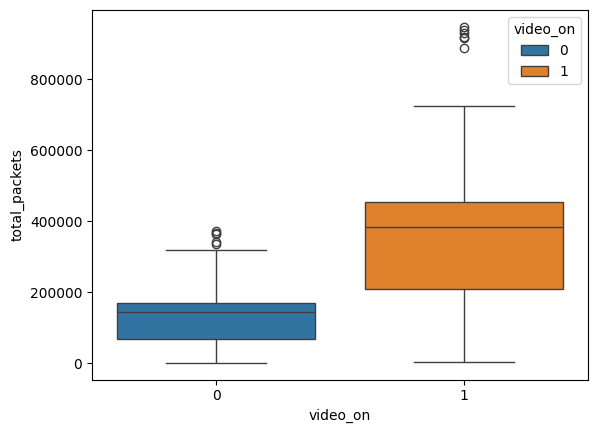

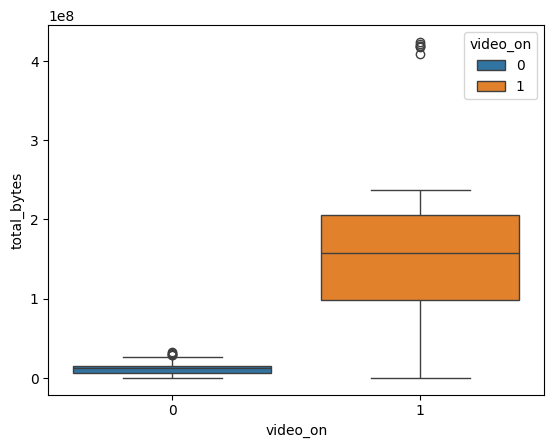

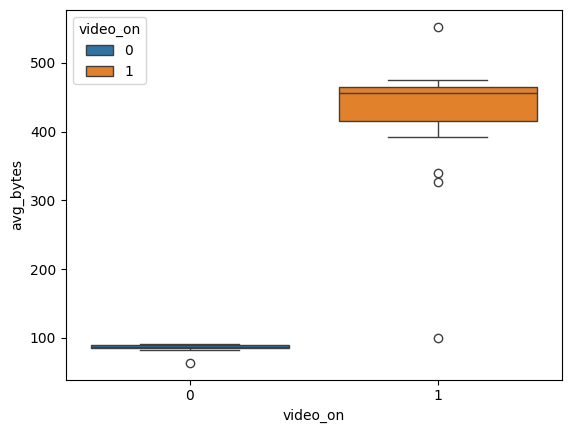

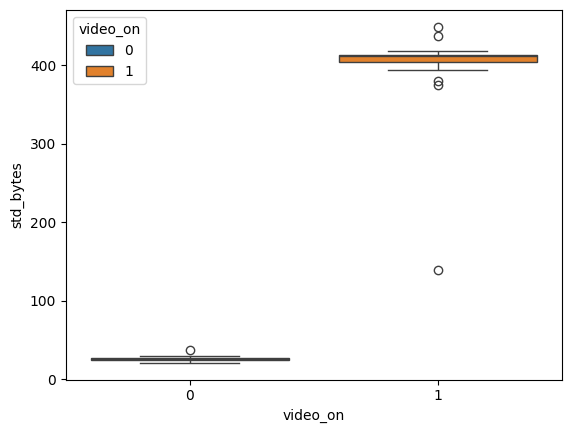

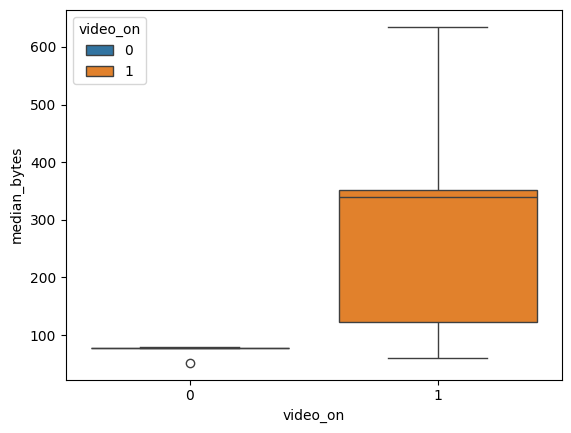

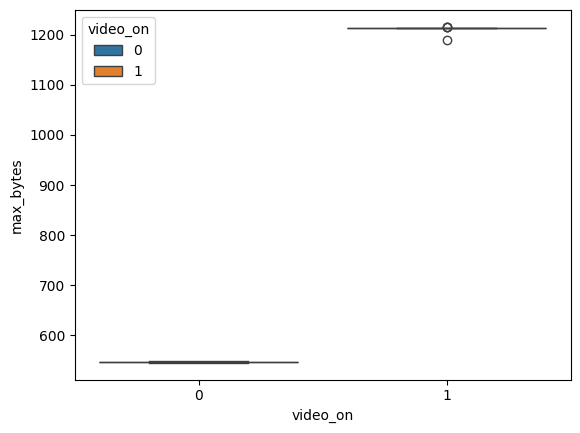

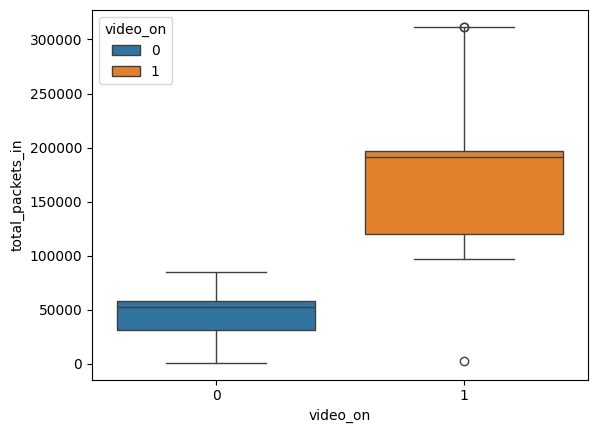

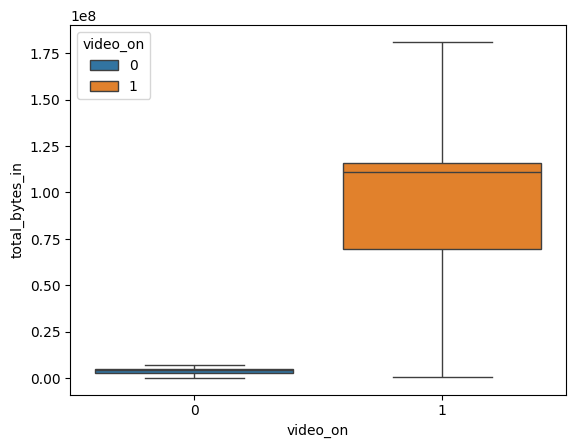

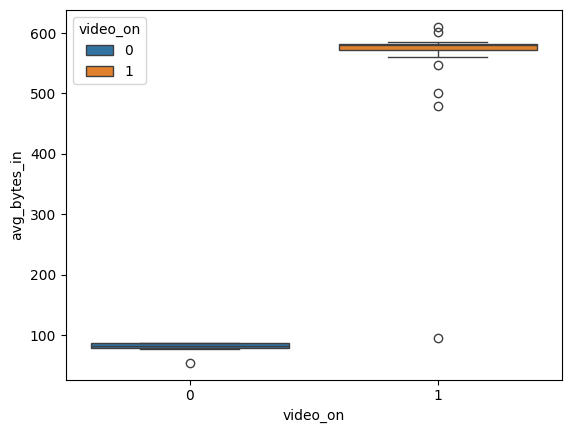

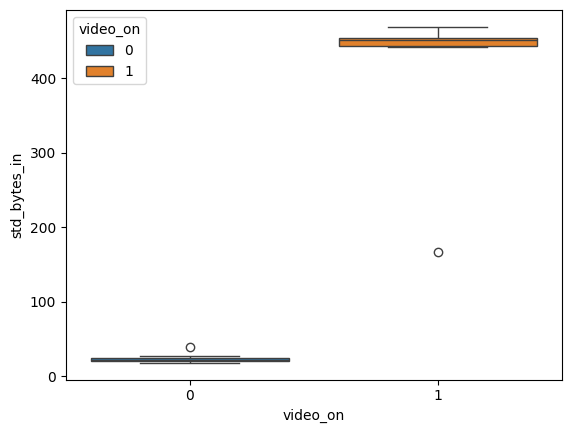

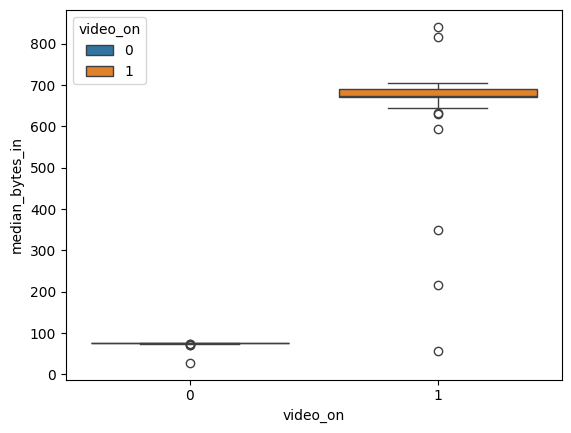

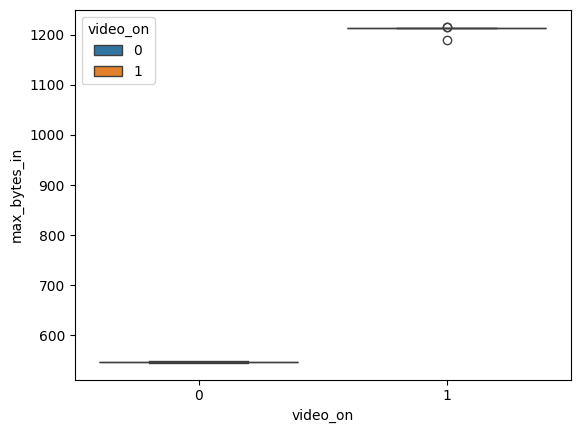

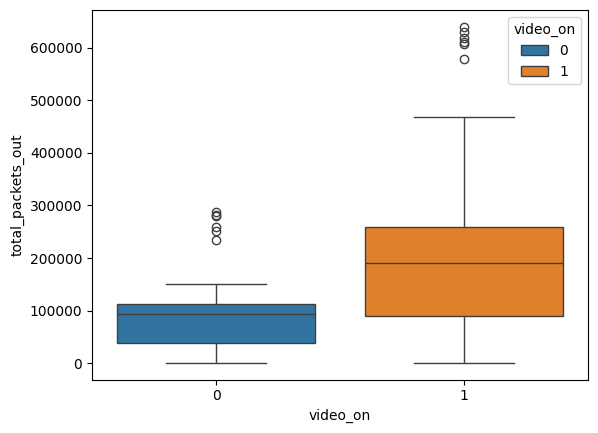

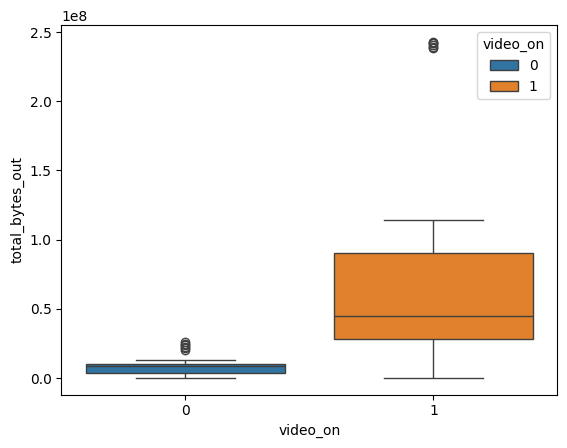

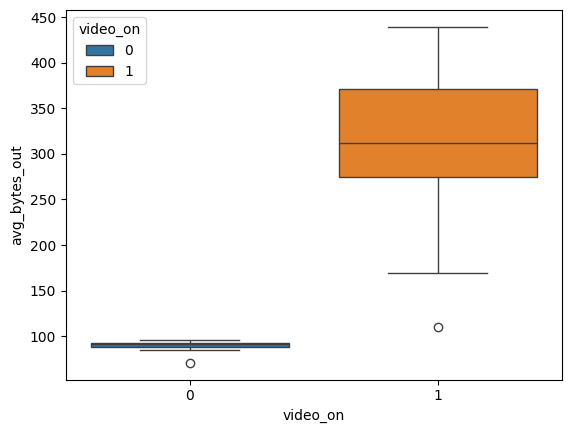

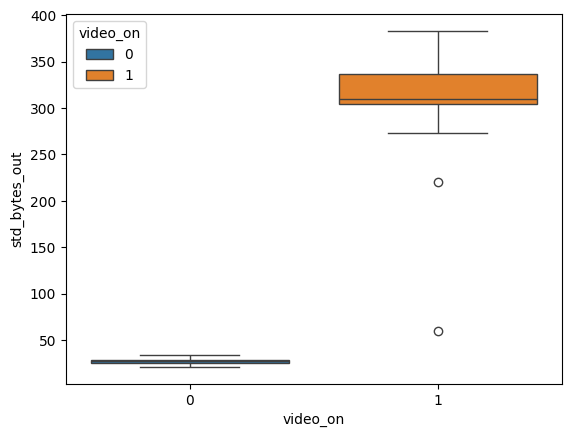

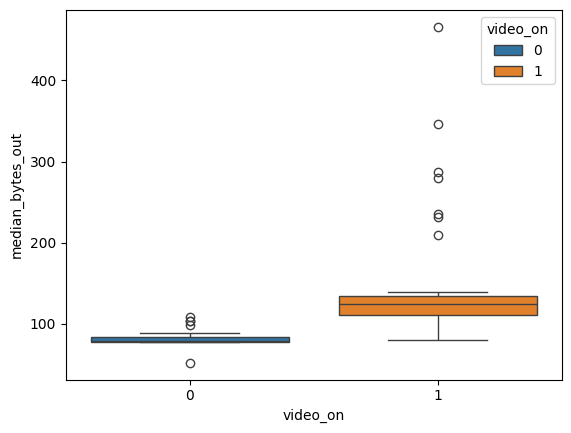

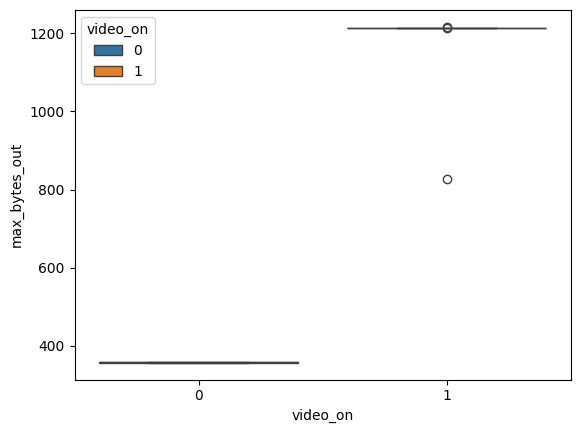

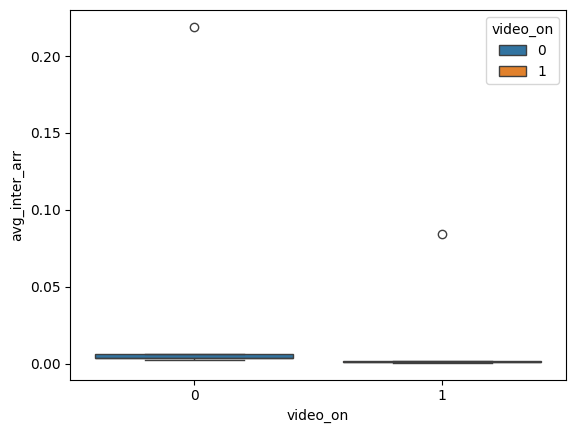

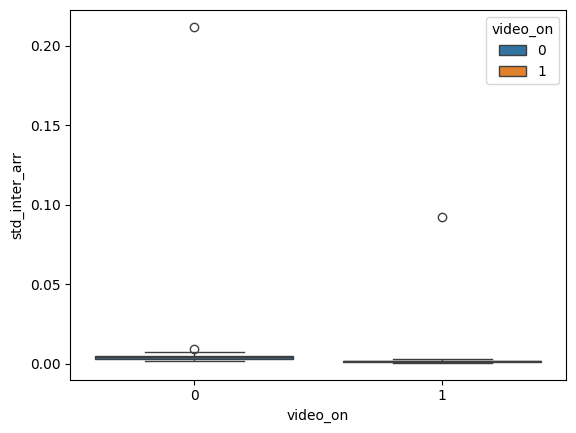

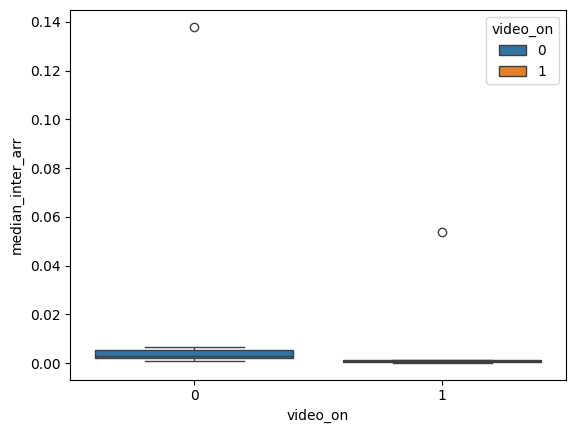

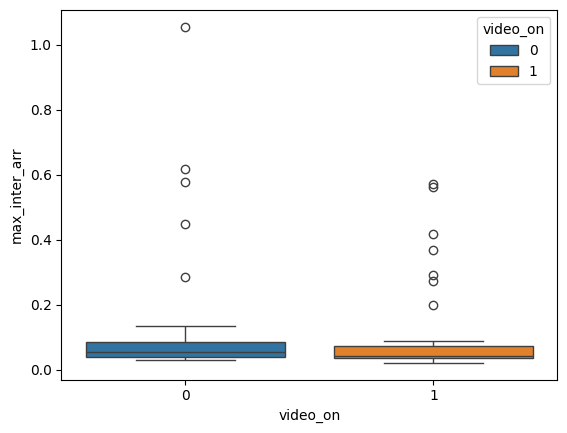

In [22]:
count = 1 # Initialize counter for subplot index

# Calculate the total number of plots to determine figure size and whether an additional subplot should be ignored
total_plots = sum(col not in ['video_on', 'num_clients', 'topology'] for col in df.columns)
plt.figure(figsize=(10, 5 * (total_plots//2)))

for col in df.columns:
    if col not in ['video_on', 'num_clients', 'topology']:
        # Create subplot position: 1 row, 2 columns, index by count
        plt.subplot(total_plots//2 + total_plots%2, 2, count)
        sns.boxplot(x='video_on', y=col, data=df, hue='video_on')
        count += 1 # Increment subplot index for the next plot

plt.tight_layout() # Adjust layout
plt.show()

## Multivariate Analysis

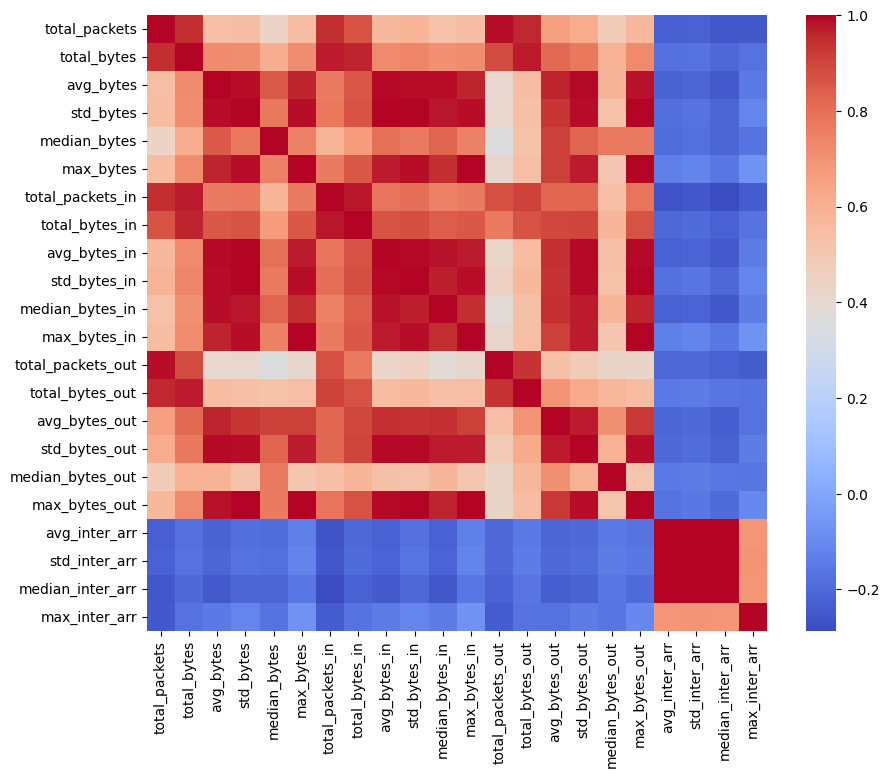

In [23]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
corr = df.drop(['video_on', 'num_clients', 'topology'], axis=1).corr()
sns.heatmap(corr, cmap='coolwarm')
plt.show()

## Logistic Regression

In [12]:
X = df[['avg_bytes']]
X = sm.add_constant(X)
y = df['video_on']

logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations 25


/Users/kohtaasakura/Library/Caches/pypoetry/virtualenvs/dsci599project-z6CffgD4-py3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/kohtaasakura/Library/Caches/pypoetry/virtualenvs/dsci599project-z6CffgD4-py3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                   72
Model:                          Logit   Df Residuals:                       70
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                   1.000
Time:                        20:56:10   Log-Likelihood:                 0.0000
converged:                       True   LL-Null:                       -49.879
Covariance Type:            nonrobust   LLR p-value:                 1.722e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1498.4024      1e+21  -1.49e-18      1.000   -1.97e+21    1.97e+21
avg_bytes     15.4737    1.1e+19   1.41e-18      1.000   -2.15e+19    2.15e+19
==============================================================================

Complete Separation: The results show that there iscomplete separation or perfect prediction.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

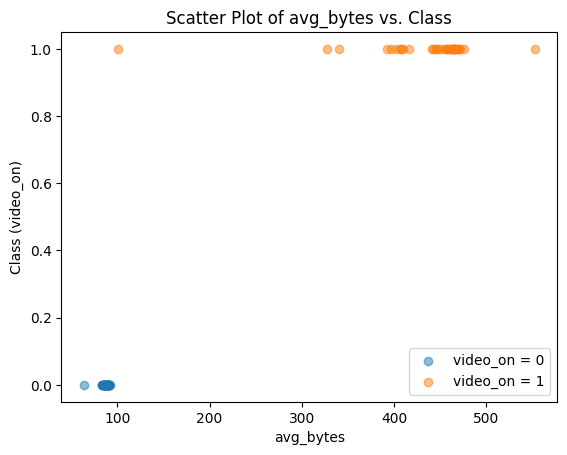

In [24]:
# Scatter plot
plt.scatter(df['avg_bytes'][df['video_on'] == 0], df['video_on'][df['video_on'] == 0], label='video_on = 0', alpha=0.5)
plt.scatter(df['avg_bytes'][df['video_on'] == 1], df['video_on'][df['video_on'] == 1], label='video_on = 1', alpha=0.5)

# Label the plot
plt.xlabel('avg_bytes')
plt.ylabel('Class (video_on)')
plt.title('Scatter Plot of avg_bytes vs. Class')
plt.legend()

plt.show()

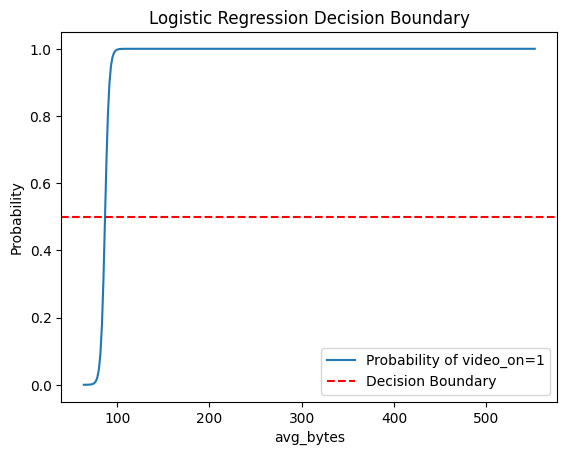

In [25]:
# Generate a range of avg_bytes values covering the observed range
avg_bytes_range = np.linspace(df['avg_bytes'].min(), df['avg_bytes'].max(), 300)

# Add a constant term to the range for prediction
X_new = sm.add_constant(avg_bytes_range)

predicted_probs = result.predict(X_new)

# Plot the predicted probabilities
plt.plot(avg_bytes_range, predicted_probs, label='Probability of video_on=1')

# Add the decision boundary at probability=0.5
plt.axhline(y=0.5, color='red', linestyle='--', label='Decision Boundary')

# Label the plot
plt.xlabel('avg_bytes')
plt.ylabel('Probability')
plt.title('Logistic Regression Decision Boundary')
plt.legend()

plt.show()

In [13]:
X = df[['std_bytes']]
X = sm.add_constant(X)
y = df['video_on']

logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

         Current function value: 0.000000
         Iterations: 35


/Users/kohtaasakura/Library/Caches/pypoetry/virtualenvs/dsci599project-z6CffgD4-py3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/kohtaasakura/Library/Caches/pypoetry/virtualenvs/dsci599project-z6CffgD4-py3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/kohtaasakura/Library/Caches/pypoetry/virtualenvs/dsci599project-z6CffgD4-py3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/kohtaasakura/Library/Caches/pypoetry/virtu

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                   72
Model:                          Logit   Df Residuals:                       70
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                   1.000
Time:                        20:56:23   Log-Likelihood:            -2.3611e-10
converged:                      False   LL-Null:                       -49.879
Covariance Type:            nonrobust   LLR p-value:                 1.722e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.5172   1.09e+05     -0.000      1.000   -2.14e+05    2.14e+05
std_bytes      0.4551   1554.879      0.000      1.000   -3047.052    3047.963
==============================================================================

Complete Separation: The results show that there iscomplete separation or perfect prediction.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

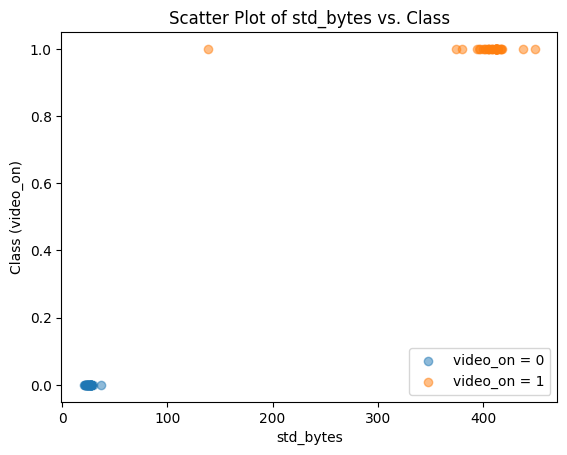

In [26]:
# Scatter plot
plt.scatter(df['std_bytes'][df['video_on'] == 0], df['video_on'][df['video_on'] == 0], label='video_on = 0', alpha=0.5)
plt.scatter(df['std_bytes'][df['video_on'] == 1], df['video_on'][df['video_on'] == 1], label='video_on = 1', alpha=0.5)

# Label the plot
plt.xlabel('std_bytes')
plt.ylabel('Class (video_on)')
plt.title('Scatter Plot of std_bytes vs. Class')
plt.legend()

plt.show()